In [1]:
import numpy as np
from scipy import fftpack
import tensorly as tl
from util import square_tensor_gen, TensorInfoBucket, RandomInfoBucket, eval_mse, eval_rerr
from sketch import Sketch
import time
from tensorly.decomposition import tucker
from sketch_recover import SketchTwoPassRecover
from sketch_recover import SketchOnePassRecover
import matplotlib 
import matplotlib.pyplot as plt
from simulation import Simulation
import pickle 
plt.style.use('seaborn-paper')
%matplotlib inline 

Using mxnet backend.
/Users/apple/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/apple/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL
Using numpy backend.


In [2]:
gen_types = ['id', 'id1', 'id2', 'spd', 'fpd', 'sed', 'fed', 'lk']
rs = [1,5]
dim = 3

In [3]:
def sim_name(gen_type,r,noise_level,dim): 
    if noise_level == 0: 
        noise = "no"
    else: 
        noise = str(int(np.log10(noise_level)))
    return "data/typ"+gen_type+"_r"+str(r)+"_noise"+noise+"_dim"+str(dim)

In [4]:
def run_nssim(gen_type,r,noise_level, ns = np.arange(100,101,100), dim = 3, sim_runs = 1,random_seed = 1): 
    sim_list = []
    for id, n in enumerate(ns): 
        ks =np.arange(r, int(n/2),int(n/20)) 
        ho_svd_rerr = np.zeros((sim_runs, len(ks)))
        two_pass_rerr = np.zeros((sim_runs,len(ks)))
        one_pass_rerr = np.zeros((sim_runs,len(ks)))
        for i in range(sim_runs): 
            for idx, k in enumerate(ks): 
                simu = Simulation(np.repeat(n,dim), r, k, 2*k+1, RandomInfoBucket(random_seed), gen_type, noise_level)
                _, rerr = simu.ho_svd()
                ho_svd_rerr[i,idx] = rerr 
                _, rerr = simu.two_pass() 
                two_pass_rerr[i,idx] = rerr
                _, rerr = simu.one_pass()
                one_pass_rerr[i,idx] = rerr 
        sim_list.append([two_pass_rerr,one_pass_rerr,ho_svd_rerr])
    pickle.dump( sim_list, open(sim_name(gen_type,r,noise_level,dim) +".pickle", "wb" ) )
    return sim_list

In [6]:
result = run_nssim('id',5,0.01)

Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.


KeyboardInterrupt: 

In [15]:
def plot_nssim(gen_type,r,noise_level,name, ns = np.arange(100,101,100), dim = 3, sim_runs = 1,random_seed = 1): 
    sim_list = pickle.load( open( sim_name(gen_type,r,noise_level,dim)+".pickle", "rb" ) ) 
    plt.close()
    plt.figure(figsize = (len(ns)*5,5))
    for plot_id, n in enumerate(ns): 
        ks =np.arange(r, int(n/2),int(n/20)) 
        plt.subplot(1,len(ns),plot_id+1) 
        plt.plot(ks/n,np.mean(sim_list[plot_id][0],0), label = 'two_pass',linestyle = '--',marker = 'X')
        plt.plot(ks/n,np.mean(sim_list[plot_id][1],0), label = 'one_pass', marker = 's',markeredgewidth=1,markeredgecolor='orange', markerfacecolor='None') 
        plt.plot(ks/n,np.mean(sim_list[plot_id][2],0), label = 'tucker', linestyle = ':', marker = 'o', markeredgewidth=1,markeredgecolor='g', markerfacecolor='None') 
        plt.legend(loc = 'best')
        plt.title("I = %s"%(n))
        plt.xlabel('k/I')
        plt.ylabel('log(Relative Error)')
        plt.yscale('log')
        plt.axis('equal')
        xmin, xmax = plt.xlim()  
        plt.xlim((0, xmax))  
        ymin, ymax = plt.ylim()  
        plt.ylim((ymin, ymax))   
    plt.tight_layout()
    plt.savefig('plots/'+name)
    plt.show()

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1376: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


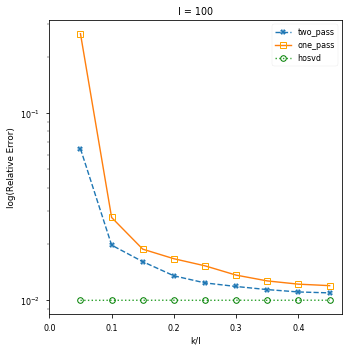

In [34]:
plot_nssim('id',5,0.01,"test_plot.pdf",ns = np.arange(100,101,100), sim_runs = 1)

In [ ]:
run_nssim('id',5,1,np.arange(200,601,200)) 
run_nssim('id',1,0.01,np.arange(200,601,200)) 
run_nssim('spd',5,0.01,np.arange(200,601,200)) 
run_nssim('fpd',5,0.01,np.arange(200,601,200)) 
run_nssim('sed',5,0.01,np.arange(200,601,200)) 
run_nssim('fed',5,0.01,np.arange(200,601,200)) 
run_nssim('lk',5,0.01,np.arange(200,601,200)) 

Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy b

Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy b

Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy b

In [8]:
run_nssim('lk',5,0.01,np.arange(200,601,200)) 

Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy b

[[array([[0.04612493, 0.01560253, 0.01324308, 0.0118295 , 0.01147797,
          0.01103034, 0.01088835, 0.01067402, 0.01046283, 0.01043103]]),
  array([[0.06890333, 0.01920985, 0.01486063, 0.01362683, 0.01268477,
          0.01208573, 0.01150977, 0.01127853, 0.01090715, 0.01087809]]),
  array([[0.01000088, 0.00999984, 0.0099999 , 0.00999798, 0.0100008 ,
          0.00999953, 0.00999445, 0.00999576, 0.00999851, 0.00999262]])],
 [array([[0.13892351, 0.01349702, 0.01152608, 0.01104685, 0.01072053,
          0.01052756, 0.01041023, 0.01033161, 0.01025779, 0.01022424]]),
  array([[0.14340886, 0.01650159, 0.01320065, 0.01185283, 0.01156776,
          0.0110626 , 0.01079299, 0.01063108, 0.01056391, 0.01045419]]),
  array([[0.01000012, 0.00999946, 0.01000221, 0.00999945, 0.00999891,
          0.00999874, 0.01000007, 0.00999865, 0.00999874, 0.00999897]])],
 [array([[0.06469422, 0.01217197, 0.01110133, 0.0107061 , 0.01052358,
          0.0103733 , 0.01027243, 0.01022834, 0.01018373, 0.01014491]]

In [ ]:
run_nssim('lk',5,0,np.arange(200,601,200))

Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy b

[[array([[4.72163780e-15, 1.41254851e-15, 1.81159700e-15, 1.23995281e-15,
          2.25577037e-15, 1.81065538e-15, 2.07148763e-15, 1.46497311e-15,
          2.02152841e-15, 1.58961120e-15]]),
  array([[5.87714661e-15, 2.34865074e-15, 4.16692637e-15, 3.51133469e-15,
          4.86351266e-15, 6.06064021e-15, 4.50128654e-15, 3.94184216e-15,
          4.55544441e-15, 4.21936841e-15]]),
  array([[2.47153027e-15, 1.38822297e-15, 2.30827868e-15, 2.13183191e-15,
          2.86982105e-15, 1.22820064e-15, 1.42396510e-15, 2.33711946e-15,
          1.60897960e-15, 2.17053324e-15]])],
 [array([[1.05843618e-14, 2.42597596e-15, 1.98259557e-15, 1.59077879e-15,
          1.92999227e-15, 1.41315464e-15, 1.63405364e-15, 2.23928306e-15,
          2.86065597e-15, 2.72214377e-15]]),
  array([[9.03331739e-15, 4.20064919e-15, 3.62728065e-15, 4.69451349e-15,
          3.92825184e-15, 4.24100002e-15, 4.03472146e-15, 4.60672013e-15,
          5.46739142e-15, 5.45110468e-15]]),
  array([[1.56897135e-15, 1.284844

In [16]:
run_nssim('id',5,1,np.arange(200,601,200)) 
run_nssim('id',5,0.1,np.arange(200,601,200)) 

Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy backend.
Using numpy b

[[array([[0.58826666, 0.15598269, 0.13465319, 0.11869417, 0.11340928,
          0.1110847 , 0.10902416, 0.10722824, 0.10511863, 0.10404182]]),
  array([[0.71448509, 0.20578723, 0.15989364, 0.13889007, 0.12928409,
          0.11860392, 0.11651886, 0.11222122, 0.11021497, 0.10783495]]),
  array([[0.09999388, 0.09997089, 0.09997714, 0.09996417, 0.09995276,
          0.09996747, 0.09995437, 0.09998427, 0.09995897, 0.10001603]])],
 [array([[0.63786093, 0.12953994, 0.1149612 , 0.1090734 , 0.10722127,
          0.10526004, 0.1043313 , 0.10338297, 0.10262181, 0.10228352]]),
  array([[0.75901836, 0.15410244, 0.13316708, 0.11986576, 0.11359458,
          0.11092958, 0.10795848, 0.1064701 , 0.10526478, 0.10423457]]),
  array([[0.10000409, 0.10000258, 0.10001316, 0.0999918 , 0.0999909 ,
          0.1000131 , 0.10001494, 0.09999825, 0.09999239, 0.0999969 ]])],
 [array([[0.59440317, 0.12038261, 0.11058539, 0.10634705, 0.10518405,
          0.10387285, 0.10283294, 0.10231698, 0.10185241, 0.10141064]]

/Users/apple/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1376: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


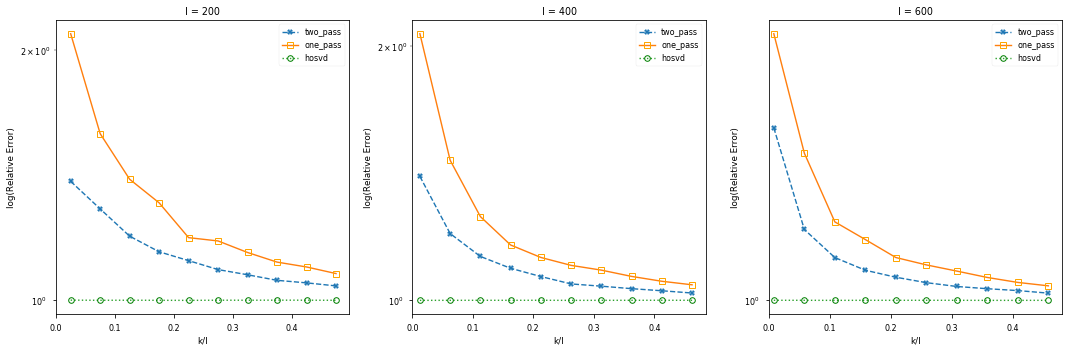

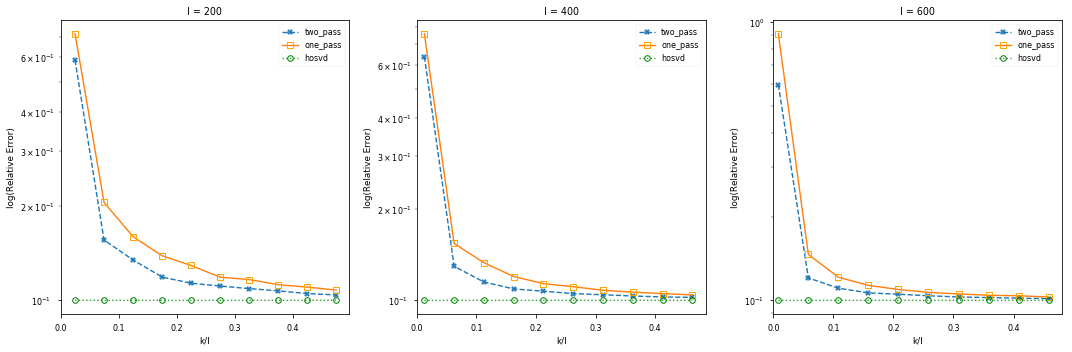

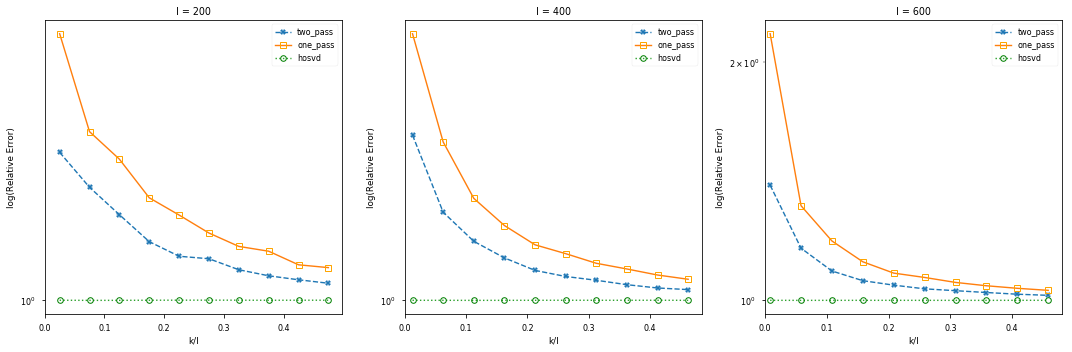

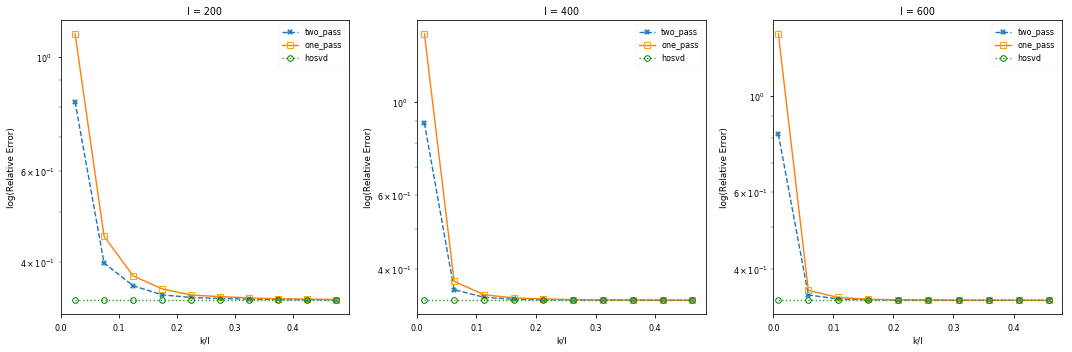

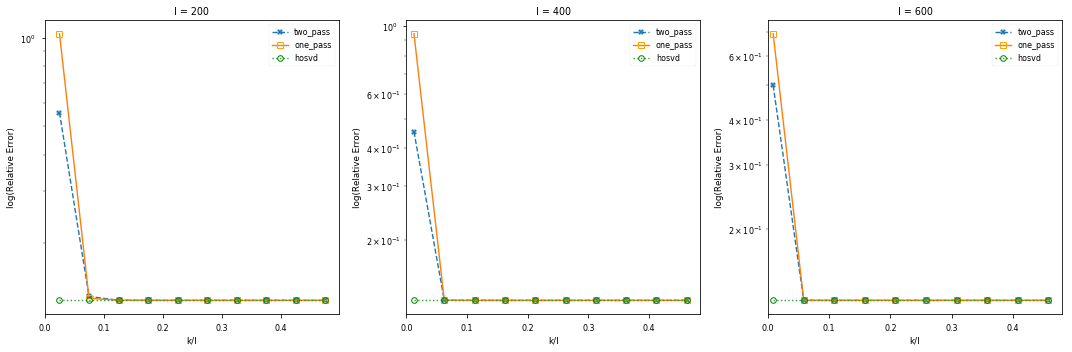

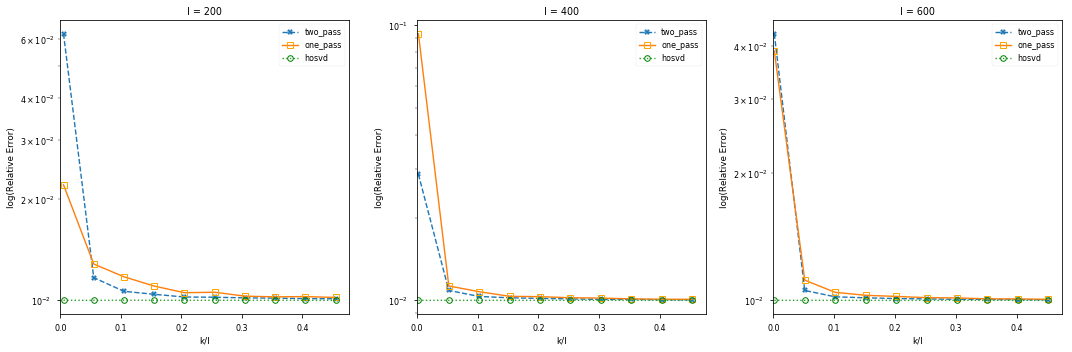

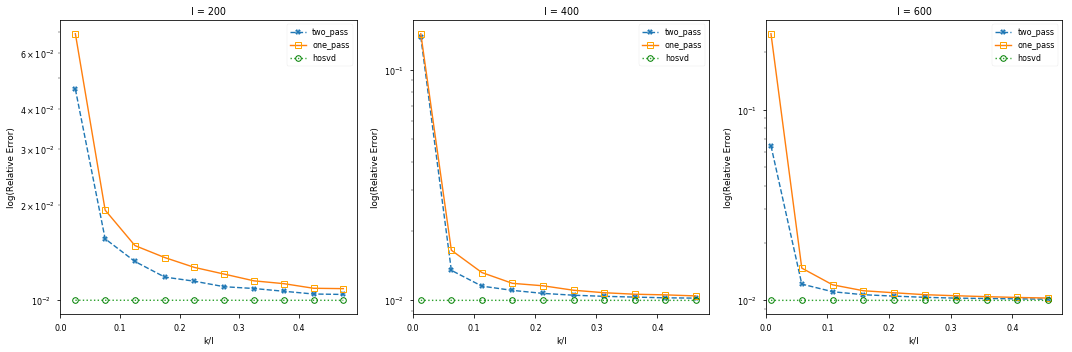

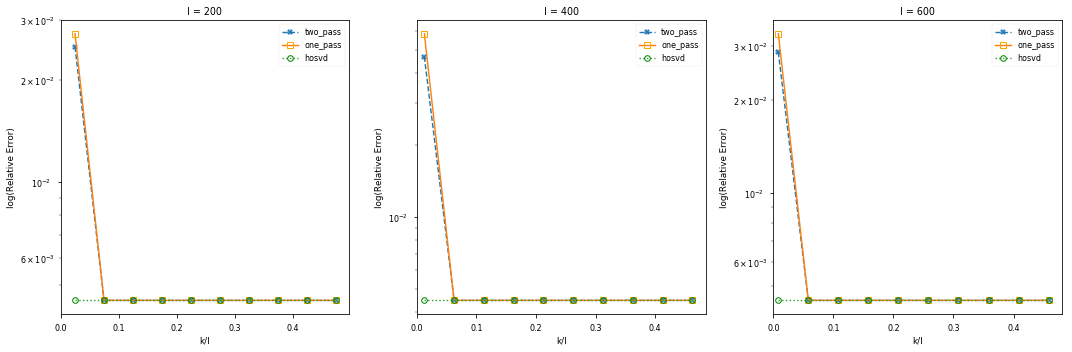

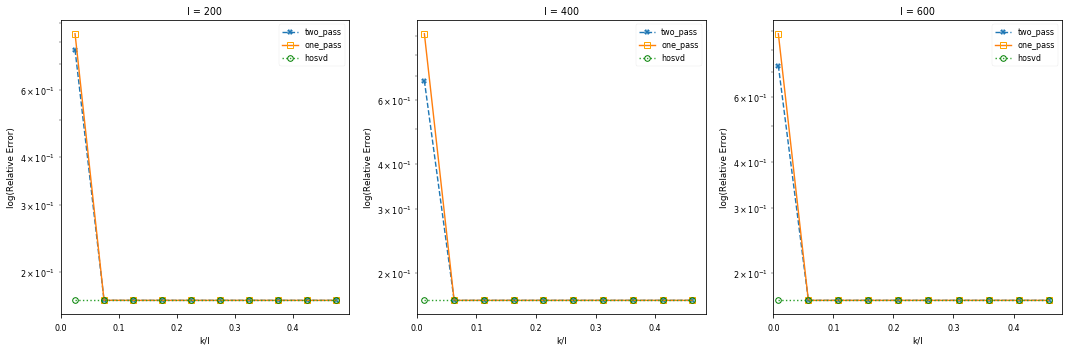

In [21]:
plot_nssim('id',5,1,"id_hnoise.pdf",ns = np.arange(200,601,200), sim_runs = 1)
plot_nssim('id',5,0.1,"id_mnoise.pdf",ns = np.arange(200,601,200), sim_runs = 1)
plot_nssim('id',5,0.01,"id_lnoise.pdf",ns = np.arange(200,601,200), sim_runs = 1)
plot_nssim('spd',5,0.01,"spd.pdf",ns = np.arange(200,601,200), sim_runs = 1)
plot_nssim('fpd',5,0.01,"fpd.pdf",ns = np.arange(200,601,200), sim_runs = 1)
plot_nssim('id',1,0.01,"id_rk1.pdf",ns = np.arange(200,601,200), sim_runs = 1)
plot_nssim('lk',5,0.01,"lk.pdf",ns = np.arange(200,601,200))
plot_nssim('fed',5,0.01,"fed.pdf",ns = np.arange(200,601,200))
plot_nssim('sed',5,0.01,"sed.pdf",ns = np.arange(200,601,200))


In [ ]:
plot_nssim('id',5,0,"id_nonoise.pdf",ns = np.arange(200,601,200))
plot_nssim('lk',5,0,,.pdf",ns = np.arange(200,601,200))
